In [1]:
from google.cloud import storage

key_path = "/Users/alexandergirardet/code/projects/real_estate/keys/sturdy-block-351315-cf8dc1e55296.json"

In [2]:
storage_client = storage.Client.from_service_account_json(key_path, project="My First Project")

In [3]:
bucket_name = "rightmove_bucket"
prefix = 'rightmove_images/100023683'
delimiter = None

In [4]:
object_generator = storage_client.list_blobs(bucket_name, prefix=prefix, delimiter=delimiter)

In [6]:
property_id = 100023683
image_number = 0

In [1]:
access_token = "Bearer ya29.a0ARrdaM_I50NJgRTBNqo5YfPVaKuApscUh5UEkAgfEGfIuqCUF8QMmFmj2pL9658Bnv38vc2lvDA63ZP5HsRaNfBg9CLp2BAKjZWp7t0QM1xLUPRR4QRsQSDLblnAn-XrRnlFTryIC25bCUF_LiA3tLQ1QGN2"

In [4]:
headers = {"Authorization": access_token}

In [2]:
bucket_name = "rightmove_bucket"
prefix = 'rightmove_images/100023683'

In [20]:
property_url = f"https://storage.googleapis.com/storage/v1/b/{bucket_name}/o?prefix={prefix}"

In [18]:
import requests
res = requests.get(url)

In [14]:
images = res.json()['items']

In [53]:
for image in images:
    print(image['name'])

rightmove_images/100023683/property_image_0.jpg
rightmove_images/100023683/property_image_1.jpg
rightmove_images/100023683/property_image_2.jpg
rightmove_images/100023683/property_image_3.jpg
rightmove_images/100023683/property_image_4.jpg
rightmove_images/100023683/property_image_5.jpg


In [44]:
url_object = "rightmove_images/100023683/property_image_1.jpg"

In [ ]:
curl -X GET \
  -H "Authorization: Bearer OAUTH2_TOKEN" \
  -o "SAVE_TO_LOCATION" \
  "https://storage.googleapis.com/storage/v1/b/BUCKET_NAME/o/OBJECT_NAME?alt=media"

In [37]:
import urllib

In [45]:
url_obj = urllib.parse.quote_plus(url_object)

In [ ]:
https://storage.googleapis.com/rightmove_bucket/rightmove_images/104567816/property_image_1.jpg

In [91]:
def extract_features(image_data, model):
    # load the image as a 224x224 array
        img = Image.open(io.BytesIO(image_data))
        img = img.resize((224, 244))
        # convert from 'PIL.Image.Image' to numpy array
        img = np.array(img) 
        # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
        reshaped_img = img.reshape(1,224,224,3) 
        # prepare image for model
        imgx = preprocess_input(reshaped_img)
        # get the feature vector
        features = model.predict(imgx, use_multiprocessing=True)
        return features

In [70]:
import requests

# headers = {
#     'Authorization': access_token,
# }

params = {
    'alt': 'media',
}

encoded_params = urllib.parse.urlencode(params)

url = f'https://storage.googleapis.com/storage/v1/b/{bucket_name}/o/{url_obj}?' + encoded_params

response = requests.get(url)

# with open('SAVE_TO_LOCATION', 'wb') as f:
#     f.write(response.content)



In [88]:
from PIL import Image
import io
import numpy as np

In [89]:
con = response.content

In [142]:
gcp_headers = {
            'Content-Type': 'text/plain'
            }

data = con

image_gcp_url = f"https://storage.googleapis.com/upload/storage/v1/b/rightmove_bucket/o?uploadType=media&name=test/test.jpg"

In [143]:
requests.post(url=image_gcp_url, headers = gcp_headers, data=data)

<Response [401]>

In [136]:
img = Image.open(io.BytesIO(con))
img = img.resize((244, 244))

In [137]:
img_arr= np.array(img)

In [138]:
img_arr.shape

(244, 244, 3)

In [139]:
img_arr.reshape(1, 244, 244, 3)

array([[[[188, 155, 110],
         [189, 156, 111],
         [189, 156, 111],
         ...,
         [ 65,  41,  89],
         [ 65,  41,  89],
         [ 64,  40,  88]],

        [[187, 154, 109],
         [188, 155, 110],
         [189, 156, 111],
         ...,
         [ 65,  41,  89],
         [ 65,  41,  89],
         [ 64,  40,  88]],

        [[187, 154, 109],
         [188, 155, 110],
         [189, 156, 111],
         ...,
         [ 65,  41,  89],
         [ 65,  41,  89],
         [ 67,  43,  91]],

        ...,

        [[127, 126, 105],
         [126, 125, 104],
         [125, 124, 103],
         ...,
         [134,   0,  24],
         [134,   0,  24],
         [134,   0,  24]],

        [[128, 127, 106],
         [127, 126, 105],
         [125, 124, 103],
         ...,
         [134,   0,  24],
         [134,   0,  24],
         [134,   0,  24]],

        [[127, 126, 105],
         [127, 126, 105],
         [126, 125, 104],
         ...,
         [132,   0,  22],
        

In [106]:
img_arr.reshape(1,224,224,3) 

ValueError: cannot reshape array of size 163968 into shape (1,224,224,3)

In [103]:
feat = extract_features(con, model)

ValueError: cannot reshape array of size 163968 into shape (1,224,224,3)

### DOWNLOAD IMAGE

### MERGE IMAGE 

In [22]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [20]:
full_array = []
for x in range(8):
    image = Image.open(f"../test_images/rightmove_images_100148726_property_image_{x}.jpeg")
    image = image.resize((224, 224))
    image_arr = np.array(image)
    full_array.append(image_arr)

In [21]:
np_array = np.array(full_array)

In [22]:
np_array.shape

(8, 224, 224, 3)

In [3]:
image = Image.open("../test_images/rightmove_images_100148726_property_image_0.jpeg")

In [4]:
image = image.resize((256, 256))

In [7]:
image_arr = np.array(image)

In [23]:
new_model = tf.keras.models.load_model('../current_models/xcep_unfrozen_lrsPrfm.h5')

In [24]:
y_pred = new_model.predict(np_array)

1/1 [==============================] - 0s 104ms/step


### KMEANS

In [75]:
from keras.applications.vgg16 import VGG16 
from keras.models import Model
from keras.applications.vgg16 import preprocess_input 
from tensorflow.keras.preprocessing import image as image_preprocess

In [76]:
model = VGG16()
# remove the output layer
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

2022-06-14 22:47:47.045102: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-14 22:47:47.045517: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1


In [1]:
model_file = "../kmeans.joblib"

In [4]:
import pickle
loaded_model = pickle.load(open(model_file, 'rb'))

In [5]:
def extract_features(file, model):
    # load the image as a 224x224 array
    img = image_preprocess.load_img(file, target_size=(224,224))
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img) 
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3) 
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    return features

In [10]:
import numpy as np

In [11]:
data = {}

In [12]:
for x in range(8):
    image_path = f"../test_images/rightmove_images_100148726_property_image_{x}.jpeg"
    feat = extract_features(image_path, model)
    data[image_path] = feat

2022-06-13 17:18:48.659207: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-06-13 17:18:48.777893: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 8ms/step


In [15]:
filenames = np.array(list(data.keys()))

# get a list of just the features
feat = np.array(list(data.values()))
feat = feat.reshape(-1,4096)

In [44]:
image_classes = ['bathroom', 'bedroom', 'kitchen', 'livingroom']


In [24]:
preds = loaded_model.predict(feat)

In [40]:
files = []
for i, file in enumerate(filenames):
    if preds[i] == 0:
        files.append(file)

In [45]:
for file in files:
    img = image_preprocess.load_img(file, target_size=(224,224))
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img) 
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3) 
    
    pred = new_model.predict(reshaped_img)
    print(np.argmax(pred))

1/1 [==============================] - 0s 16ms/step
3
1/1 [==============================] - 0s 16ms/step
3
1/1 [==============================] - 0s 15ms/step
3
1/1 [==============================] - 0s 15ms/step
1
1/1 [==============================] - 0s 15ms/step
1
1/1 [==============================] - 0s 16ms/step
3


3
3
3
1
1
3
3
3


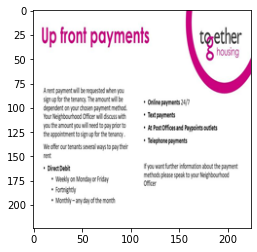

In [53]:
for image, arr in zip(np_array, y_pred_list):
    plt.imshow(image)
    print(np.argmax(arr))